In [1]:
# ==========================================
# IMPORTACIÓN DE LIBRERÍAS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Configuracion de estilo visual tipo reporte financiero para todo el notebook
sns.set_theme(style="whitegrid")

In [2]:
#Fase 1: Limpieza de datos

In [3]:
#Carga de dataset
df = pd.read_csv('credit_risk_dataset.csv')

#Primeras 5 filas
display(df.head())

#Resumen de columnas, tipos de datos y valores nulos
df.info()

#Imputamos (rellenamos) los valores nulos de la tasa de interes con su mediana
mediana_interes = df['loan_int_rate'].median()
df['loan_int_rate'] = df['loan_int_rate'].fillna(mediana_interes)

#Hago lo mismo para los años de antiguedad laboral
mediana_antiguedad = df['person_emp_length'].median()
df['person_emp_length'] = df['person_emp_length'].fillna(mediana_antiguedad)

#Vuelvo a pedir el recuento de nulos para confirmar que la limpieza funciono
print("\nValores Nulos despues de la limpieza:")
print(df.isnull().sum())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

Valores Nulos despues de la li

In [4]:
#Fase 2: Analisis Exploratorio de Datos (EDA)

--- Antes de limpiar ---
Edad maxima registrada: 144 años
Antiguedad laboral maxima registrada: 123.0 años
Cantidad de clientes actuales: 32581

--- Despues de limpiar ---
Edad maxima registrada: 94 años
Antiguedad laboral maxima registrada: 41.0 años
Cantidad de clientes actuales: 32574



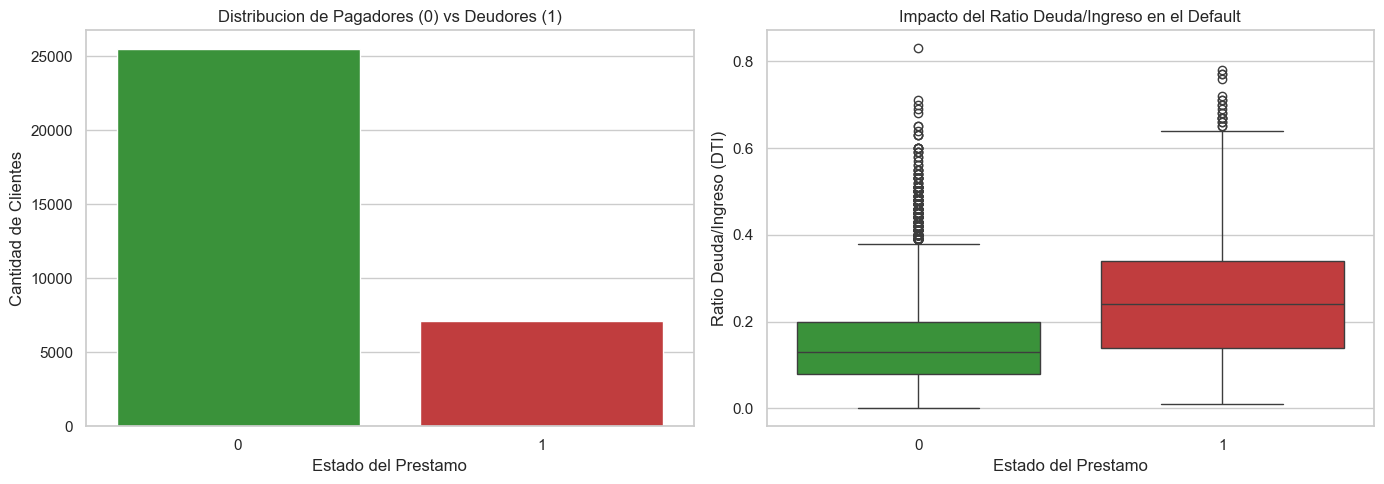

In [5]:
#Busqueda de valores maximos absurdos
print("--- Antes de limpiar ---")
print(f"Edad maxima registrada: {df['person_age'].max()} años")
print(f"Antiguedad laboral maxima registrada: {df['person_emp_length'].max()} años")
print(f"Cantidad de clientes actuales: {df.shape[0]}\n")

#Aplicacion de filtros logicos de negocio (borramos los errores)
#Nos quedamos solo con personas de hasta 100 años y que trabajen hace 60 años o menos
df = df[df['person_age'] <= 100]
df = df[df['person_emp_length'] <= 60]

#Verifico el resultado
print("--- Despues de limpiar ---")
print(f"Edad maxima registrada: {df['person_age'].max()} años")
print(f"Antiguedad laboral maxima registrada: {df['person_emp_length'].max()} años")
print(f"Cantidad de clientes actuales: {df.shape[0]}\n")

#Creacion de lienzo con dos espacios (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Grafico 1: El desbalanceo de clases (¿Cuantos pagan vs cuantos defaultean?)
sns.countplot(data=df, x='loan_status', hue='loan_status', ax=axes[0], palette=['#2ca02c', '#d62728'], legend=False)
axes[0].set_title('Distribucion de Pagadores (0) vs Deudores (1)')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xlabel('Estado del Prestamo')

#Grafico 2: El impacto de DTI (Deuda/Ingreso) en el Default
sns.boxplot(data=df, x='loan_status', y='loan_percent_income', hue='loan_status', ax=axes[1], palette=['#2ca02c', '#d62728'], legend=False)
axes[1].set_title('Impacto del Ratio Deuda/Ingreso en el Default')
axes[1].set_ylabel('Ratio Deuda/Ingreso (DTI)')
axes[1].set_xlabel('Estado del Prestamo')

#Ajuste de margenes y graficos correspondientes
plt.tight_layout()
plt.show()

In [6]:
#Fase 3: Ingenieria de caracteristicas (Feature Engenieering)
#Uso la tecnica 0ne-Hot Encoding (o creacion de variables Dummy)

In [7]:
#Reviso cuantas columnas tengo antes de transformar
print(f"Columnas antes del encoding: {df.shape[1]}")

#Transformo el texto a numeros (Variables Dummy)
columnas_de_texto = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=columnas_de_texto, drop_first=True)

#Reviso cuantas columnas tengo ahora
print(f"Columnas despues del encoding: {df.shape[1]}\n")

#Miro como quedo la tabla
display(df.head())

Columnas antes del encoding: 12
Columnas despues del encoding: 23



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False


In [8]:
#Fase 4: Modelado Predictivo

In [9]:
#Separo las variables (X) de nuestro objetivo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

#Divido en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizacion de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Instanciar y entrenar el modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_scaled, y_train)

#Genero predicciones sobre los datos de prueba
predicciones = modelo_logistico.predict(X_test_scaled)
probabilidades = modelo_logistico.predict_proba(X_test_scaled)[:, 1]

print("Modelo creado con exito! Listo para ser evaluado.")

Modelo creado con exito! Listo para ser evaluado.


In [10]:
# Fase 5: Evaluacion de Modelo - Metricas

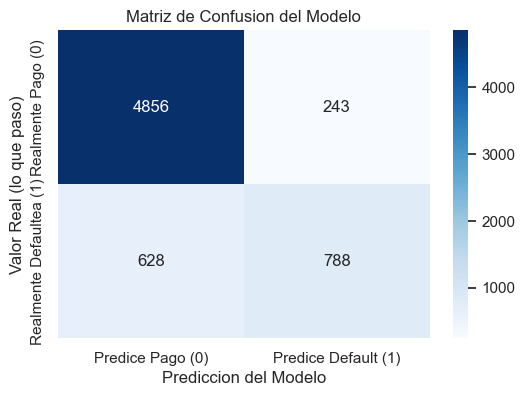


--- Reporte de Clasificacion --- 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5099
           1       0.76      0.56      0.64      1416

    accuracy                           0.87      6515
   macro avg       0.82      0.75      0.78      6515
weighted avg       0.86      0.87      0.86      6515


 Area bajo la curva(ROC AUC): 0.8740

--------------------------------------------------


In [11]:
#Creo la Matriz de Confusion Visual
cm = confusion_matrix(y_test, predicciones)

#Uso un mapa de calor para que sea facil de leer (fmt='d' evita notacion cientifica)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predice Pago (0)', 'Predice Default (1)'],
            yticklabels=['Realmente Pago (0)', 'Realmente Defaultea (1)'])
plt.title('Matriz de Confusion del Modelo')
plt.ylabel('Valor Real (lo que paso)')
plt.xlabel('Prediccion del Modelo')
plt.show()

#Imprimo el Reporte de Clasificacion (Precision, Recall, F1)
print("\n--- Reporte de Clasificacion --- \n")
print(classification_report(y_test, predicciones))

#Calculo la nota global del modelo (Curva ROC AUC)
auc = roc_auc_score(y_test, probabilidades)
print(f"\n Area bajo la curva(ROC AUC): {auc:.4f}\n")
print("-" * 50)


In [12]:
#Vuelvo a entrenar al modelo para arreglar el problema con el Recall
modelo_balanceado = LogisticRegression(class_weight='balanced')

#Lo entreno
modelo_balanceado.fit(X_train_scaled, y_train)

#Genero nuevas predicciones
predicciones_bal=modelo_balanceado.predict(X_test_scaled)

#Imprimo nuevo reporte
print("--- Nuevo reporte (Modelo Balanceado) ---")
print(classification_report(y_test, predicciones_bal))

#Nueva matriz
cm_bal = confusion_matrix(y_test, predicciones_bal)
print("n Nuevos Falsos Negativos: ", cm_bal[1][0])
print("Nuevos Verdaderos Positivos (Atrapados):", cm_bal[1][1])

--- Nuevo reporte (Modelo Balanceado) ---
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5099
           1       0.55      0.78      0.64      1416

    accuracy                           0.81      6515
   macro avg       0.74      0.80      0.76      6515
weighted avg       0.85      0.81      0.82      6515

n Nuevos Falsos Negativos:  305
Nuevos Verdaderos Positivos (Atrapados): 1111


In [13]:
#Fase 6: Explicabilidad del Modelo (Feature Importance) y Business Insights.

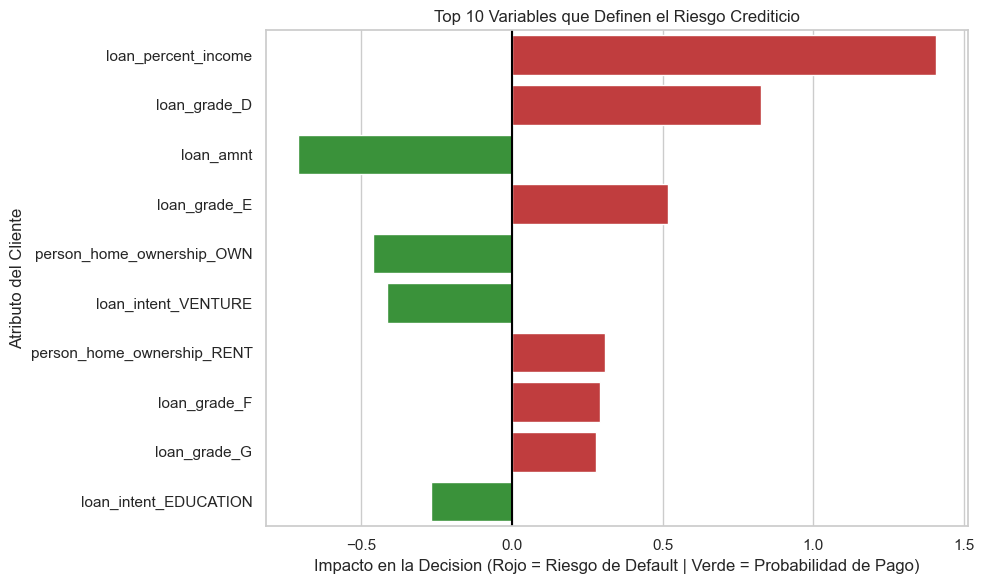

In [14]:
#Extraccion de "pesos" matematicos (coeficientes) del modelo balanceado
importancia = modelo_balanceado.coef_[0]
nombres_columnas = X.columns

#Armado de tabla para ordenarlos
df_importancia = pd.DataFrame({'Variable': nombres_columnas, 'Peso': importancia})

#Calculo del valor absoluto para ver el impacto total (positivo o negativo)
df_importancia['Impacto_Absoluto'] = df_importancia['Peso'].abs()
df_importancia = df_importancia.sort_values(by='Impacto_Absoluto', ascending=False)

#Grafico top 10
plt.figure(figsize=(10,6))
colores = ['#d62728' if x>0 else '#2ca02c' for x in df_importancia['Peso'].head(10)]

# --- LÍNEA CORREGIDA PARA EVITAR EL WARNING ---
sns.barplot(data=df_importancia.head(10), x='Peso', y='Variable', hue='Variable', palette=colores, legend=False)

plt.title('Top 10 Variables que Definen el Riesgo Crediticio')
plt.xlabel('Impacto en la Decision (Rojo = Riesgo de Default | Verde = Probabilidad de Pago)')
plt.ylabel('Atributo del Cliente')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()